# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os


In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion


In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.


In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
df.isnull().value_counts()


num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  flight_hour  flight_day  route  booking_origin  wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  flight_duration  booking_complete
False           False          False      False          False           False        False       False  False           False                False                 False                  False            False               50000
Name: count, dtype: int64

In [7]:
# checking noumber of unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].nunique()} ')

num_passengers: 9 
sales_channel: 2 
trip_type: 3 
purchase_lead: 470 
length_of_stay: 335 
flight_hour: 24 
flight_day: 7 
route: 799 
booking_origin: 104 
wants_extra_baggage: 2 
wants_preferred_seat: 2 
wants_in_flight_meals: 2 
flight_duration: 21 
booking_complete: 2 


Data is Highly Imbalanced


In [8]:
df["booking_complete"].value_counts()


booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [9]:

# Percentage of each trip type 
percentages = df['trip_type'].value_counts(normalize=True) * 100
print(percentages)

trip_type
RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Purchase lead time')

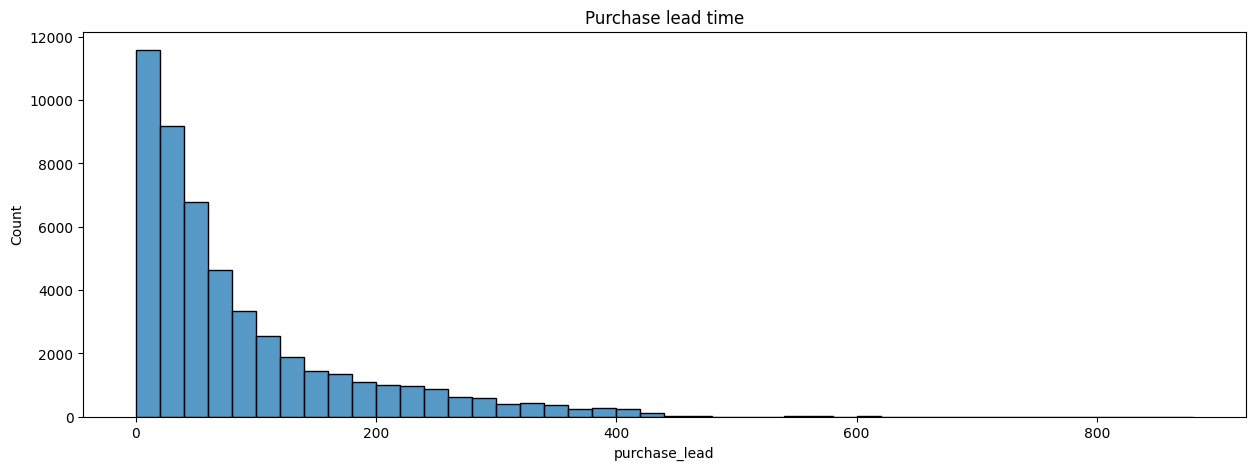

In [10]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,)
plt.title("Purchase lead time")


In [11]:
import plotly.graph_objects as go

# assuming df is your DataFrame and 'column_name' is the column you want to plot
fig = go.Figure(data=[go.Box(x=df['purchase_lead'], name='purchase_lead')])

fig.show()

In [12]:
(df.purchase_lead >450).value_counts()

purchase_lead
False    49975
True        25
Name: count, dtype: int64

Assuming People dont book 1 and a quarter year in advance, we can remove the outliers


In [13]:
df = df[df.purchase_lead <450 ]

In [14]:
print(f'Number of duplicate rows = {df.duplicated().sum()}')

Number of duplicate rows = 719


<Axes: xlabel='length_of_stay', ylabel='Count'>

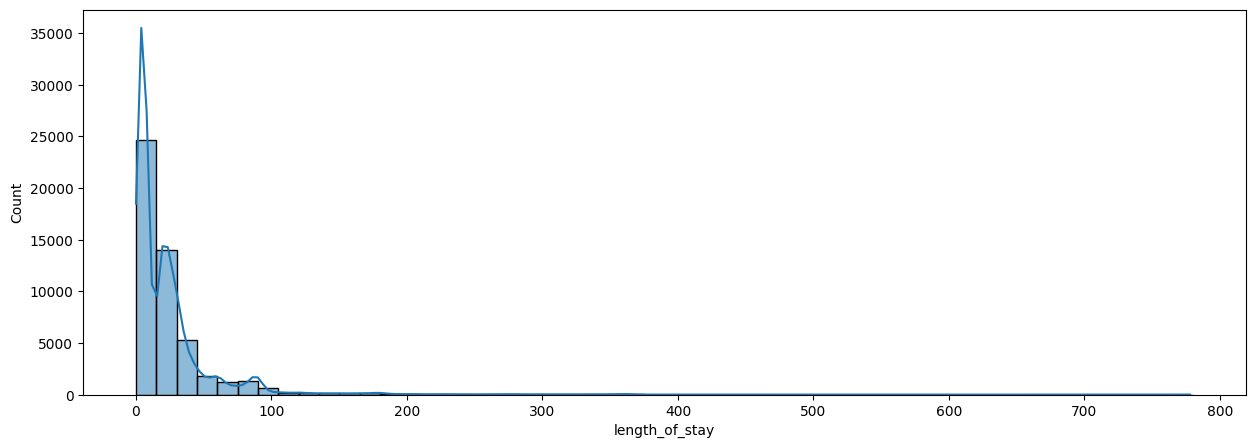

In [15]:

plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [16]:
# assuming df is your DataFrame and 'column_name' is the column you want to plot
fig = go.Figure(data=[go.Box(x=df['length_of_stay'], name='length_of_stay')])

fig.show()

In [17]:
(df.length_of_stay >450).value_counts()

length_of_stay
False    49962
True        13
Name: count, dtype: int64

In [18]:

df[df.length_of_stay> 450].booking_complete.value_counts()

booking_complete
0    11
1     2
Name: count, dtype: int64

In [19]:
df = df[df.length_of_stay <450 ]

Labelling


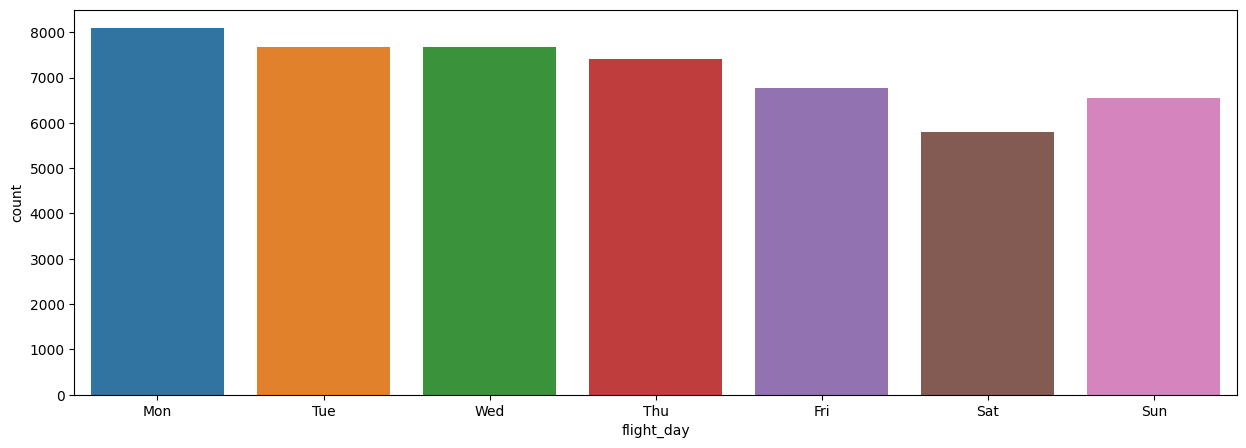

In [20]:
# assuming df is your DataFrame and 'flight_day' is the column you want to plot
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='flight_day', order=days_order)
plt.show()

In [21]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [22]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

Text(0, 0.5, 'Number of bookings')

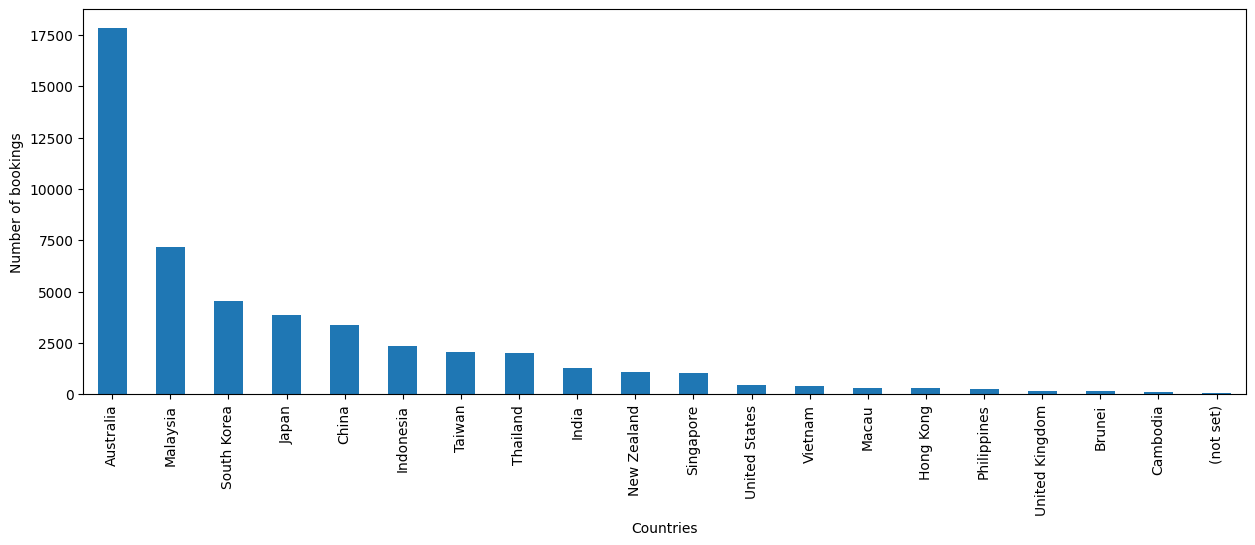

In [23]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

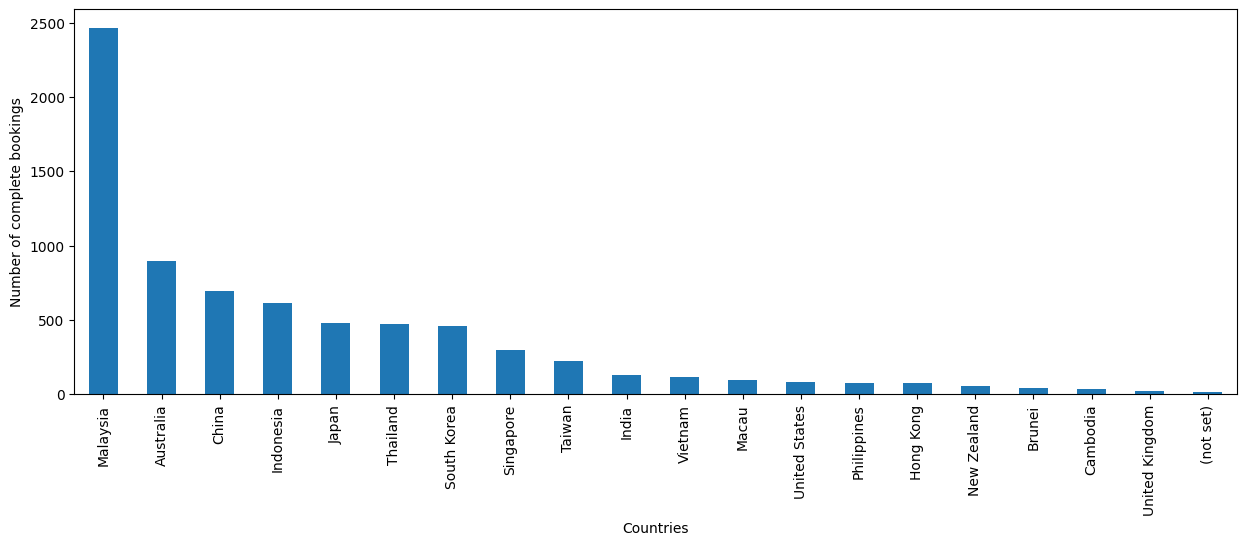

In [24]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [25]:
# Percentage of each trip type 
percentages = df['booking_complete'].value_counts(normalize=True) * 100
print(percentages)

booking_complete
0    85.040631
1    14.959369
Name: proportion, dtype: float64


Text(0, 0.5, 'Number of complete bookings')

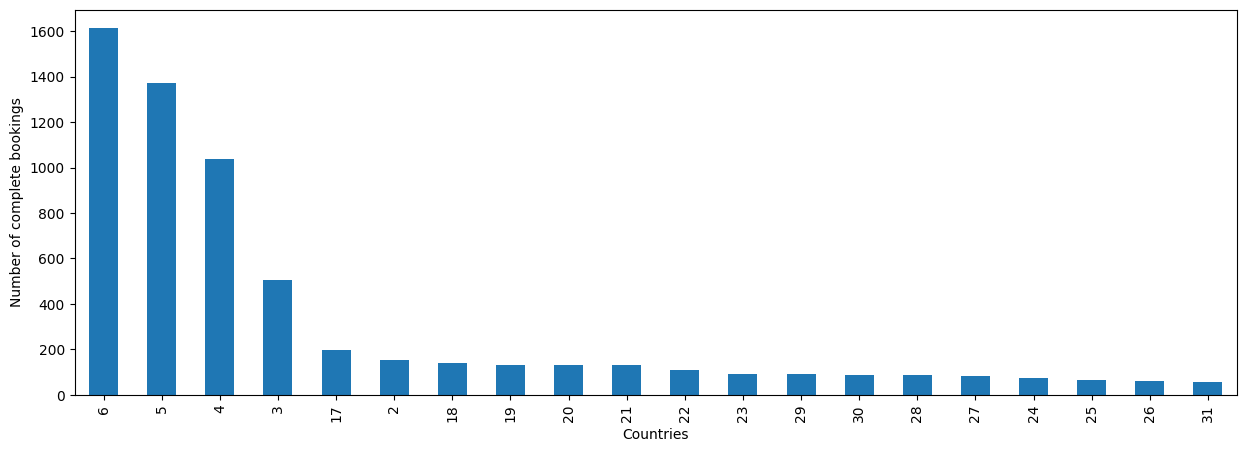

In [26]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].length_of_stay.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

People prefer to have duration of 4-6 days for their stay


In [27]:
import klib

df = klib.data_cleaning(df)

Shape of cleaned data: (49243, 14) - Remaining NAs: 0


Dropped rows: 719
     of which 719 duplicates. (Rows (first 150 shown): [196, 316, 384, 456, 513, 539, 703, 745, 765, 805, 836, 844, 862, 864, 960, 1007, 1043, 1099, 1128, 1275, 1285, 1314, 1528, 1539, 1550, 1552, 1621, 1641, 1648, 1660, 1694, 1720, 1749, 1751, 1804, 1858, 1892, 1911, 1936, 1968, 1983, 2006, 2009, 2057, 2071, 2129, 2138, 2142, 2199, 2207, 2249, 2266, 2312, 2316, 2321, 2623, 2650, 2696, 2697, 2774, 3000, 3023, 3026, 3035, 3041, 3043, 3077, 3186, 3197, 3276, 3304, 3307, 3356, 3676, 3759, 3798, 3805, 3814, 3822, 3832, 3871, 4038, 4059, 4165, 4174, 4186, 4230, 4290, 4400, 4554, 4558, 4559, 4642, 4697, 4699, 4757, 4890, 4938, 4971, 4972, 5241, 5593, 5801, 5819, 6315, 6782, 6810, 7051, 7070, 7199, 7591, 7689, 8047, 8321, 8404, 8734, 8756, 8811, 8850, 9072, 9085, 9140, 9145, 9146, 9183, 9418, 9540, 9635, 10070, 10189, 10310, 10316, 10363, 10379, 10399, 10410, 10452, 10455, 10457, 10458, 10459, 10709, 10713, 10742, 10912

In [28]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49239,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49240,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49241,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49243 entries, 0 to 49242
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         49243 non-null  int8    
 1   sales_channel          49243 non-null  category
 2   trip_type              49243 non-null  category
 3   purchase_lead          49243 non-null  int16   
 4   length_of_stay         49243 non-null  int16   
 5   flight_hour            49243 non-null  int8    
 6   flight_day             49243 non-null  int8    
 7   route                  49243 non-null  category
 8   booking_origin         49243 non-null  category
 9   wants_extra_baggage    49243 non-null  int8    
 10  wants_preferred_seat   49243 non-null  int8    
 11  wants_in_flight_meals  49243 non-null  int8    
 12  flight_duration        49243 non-null  float32 
 13  booking_complete       49243 non-null  int8    
dtypes: category(4), float32(1), int16(2), 

One hot encoding for route and sales channel


In [30]:
# Identify categorical columns
categorical_columns = ['sales_channel', 'trip_type']
# Perform one-hot encoding for each categorical column
for column in categorical_columns:
    # Perform one-hot encoding
    encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)

    # Convert boolean values to integers (0s and 1s)
    encoded_df = encoded_df.astype(int)
    # Concatenate the encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    # Drop the original categorical column
    df.drop(column, axis=1, inplace=True)


In [31]:
df.drop(['booking_origin', 'route'], axis=1, inplace = True)

In [32]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,2,27,6,9,6,1,0,1,5.62,0,0,0,1
49239,1,111,6,4,7,0,0,0,5.62,0,0,0,1
49240,1,24,6,22,6,0,0,1,5.62,0,0,0,1
49241,1,15,6,11,1,1,0,1,5.62,0,0,0,1


### Normalizing the data

The features have a Gaussian distribution, thus StandardScaler is more appropriate.


In [33]:
label = df['booking_complete']
df.drop('booking_complete', axis=1, inplace=True)
label

0        0
1        0
2        0
3        0
4        0
        ..
49238    0
49239    0
49240    0
49241    0
49242    0
Name: booking_complete, Length: 49243, dtype: int8

In [34]:
from sklearn.preprocessing import StandardScaler
def scale_data(df):
    #create a standard scaler object
    scaler = StandardScaler()

    #fit and transform the data
    scaled_df = scaler.fit_transform(df)

    #create a dataframe of scled data
    scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

    return scaled_df

In [35]:
scaled_df = scale_data(df)

### Correlation matrix


<Axes: >

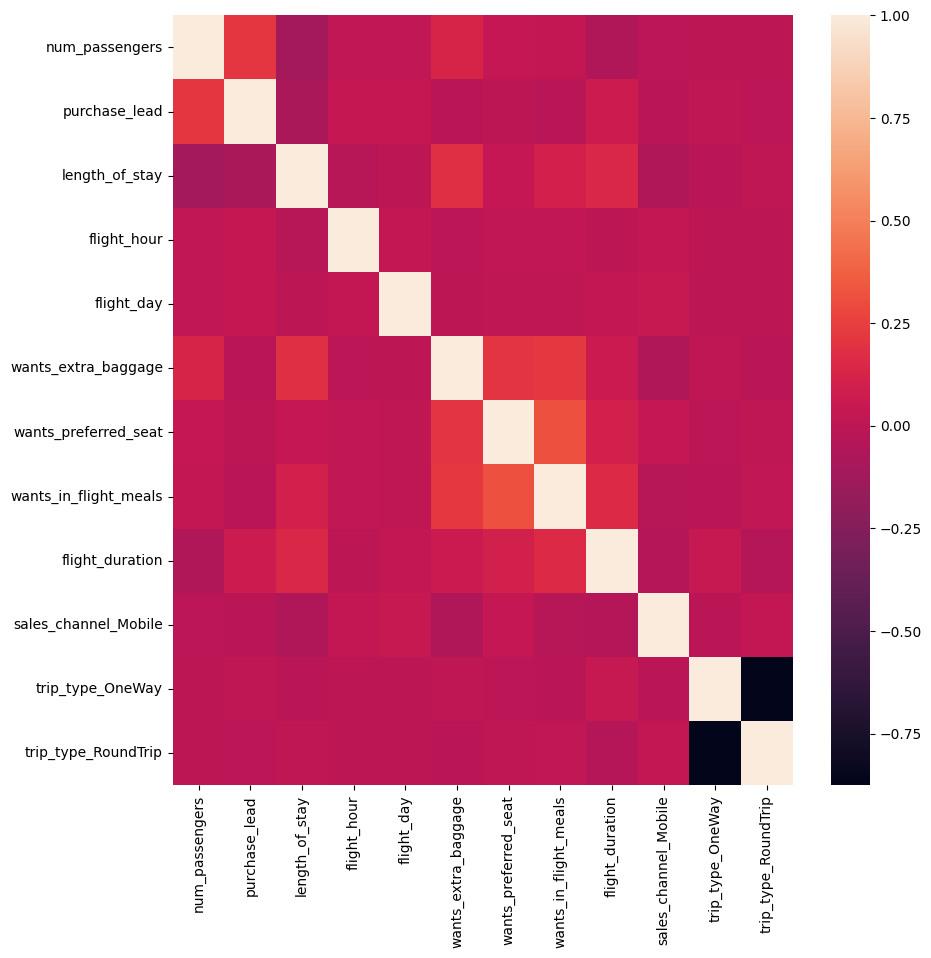

In [36]:
corr = scaled_df.corr()

plt.figure(figsize=(10,10))

#plot the heatmap
sns.heatmap(corr)

### Train Test Split


In [37]:
from sklearn.model_selection import train_test_split    

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, label, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
def model_train(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def model_evaluation(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')  

def grid_search(model, params, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
    return grid_result.best_params_
        

In [40]:
# Random Forest
rf = RandomForestClassifier()
rf_model = model_train(rf, X_train, y_train, X_test)
model_evaluation(y_test, rf_model)


Accuracy: 0.8450604122245914
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8381
           1       0.34      0.04      0.07      1468

    accuracy                           0.85      9849
   macro avg       0.60      0.51      0.49      9849
weighted avg       0.78      0.85      0.79      9849

Confusion Matrix: 
[[8262  119]
 [1407   61]]


The model is overfitting the training data due to the high imbalance in the data. We can use SMOTE to balance the data


In [41]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_smt, Y_smt = smt.fit_resample(df, label)

scaled_df = scale_data(X_smt)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, Y_smt, test_size=0.2, random_state=42)

In [42]:
# Random Forest
rf = RandomForestClassifier()
rf_model = model_train(rf, X_train, y_train, X_test)
model_evaluation(y_test, rf_model)


Accuracy: 0.8583288538493699
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8338
           1       0.87      0.85      0.86      8405

    accuracy                           0.86     16743
   macro avg       0.86      0.86      0.86     16743
weighted avg       0.86      0.86      0.86     16743

Confusion Matrix: 
[[7240 1098]
 [1274 7131]]


In [46]:
from joblib import dump

# Save the model
dump(rf_model, 'rf_model.joblib') 

['rf_model.joblib']